In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import matplotlib.colors as mcolors
import cmcrameri.cm as cmc
from tqdm import tqdm
import glob
import os
import re

# --- Parameters ---
num_fils = 309
num_segs = 20
num_steps = 500

# --- Find Data Files ---
# Assuming the directory structure contains matching simulation runs
no_tilt_files = sorted(glob.glob('../data/no_tilt_*/*/*true_states.dat'))
yes_tilt_files = sorted(glob.glob('../data/yes_tilt_*/*/*true_states.dat'))

# --- Load Data ---
no_tilt_data = [np.loadtxt(f) for f in tqdm(no_tilt_files, desc="Loading no_tilt data")]
yes_tilt_data = [np.loadtxt(f) for f in tqdm(yes_tilt_files, desc="Loading yes_tilt data")]

def get_params_from_path(file_path):
    """Extracts parameters from the file path using regex."""
    # Adjusted regex to be more robust
    match = re.search(r'([a-zA-Z_]+)_([0-9\.]+)_([a-zA-Z_]+)_([0-9\.]+)', os.path.dirname(file_path))
    params = {}
    if match:
        params[match.group(1)] = float(match.group(2))
        params[match.group(3)] = float(match.group(4))
    return params

Loading yes_tilt data: 100%|██████████| 3/3 [00:11<00:00,  3.93s/it]


In [2]:
# --- Process Data ---
def process_data(data_list):
    """Processes a list of simulation data arrays."""
    times = []
    phases_list = []
    for data in data_list:
        time = data[:, 0] / num_steps
        phases = np.mod(data[:, 2:num_fils+2], 2*np.pi)
        times.append(time)
        phases_list.append(phases)
    return times, phases_list

no_tilt_times, no_tilt_phases = process_data(no_tilt_data)
yes_tilt_times, yes_tilt_phases = process_data(yes_tilt_data)

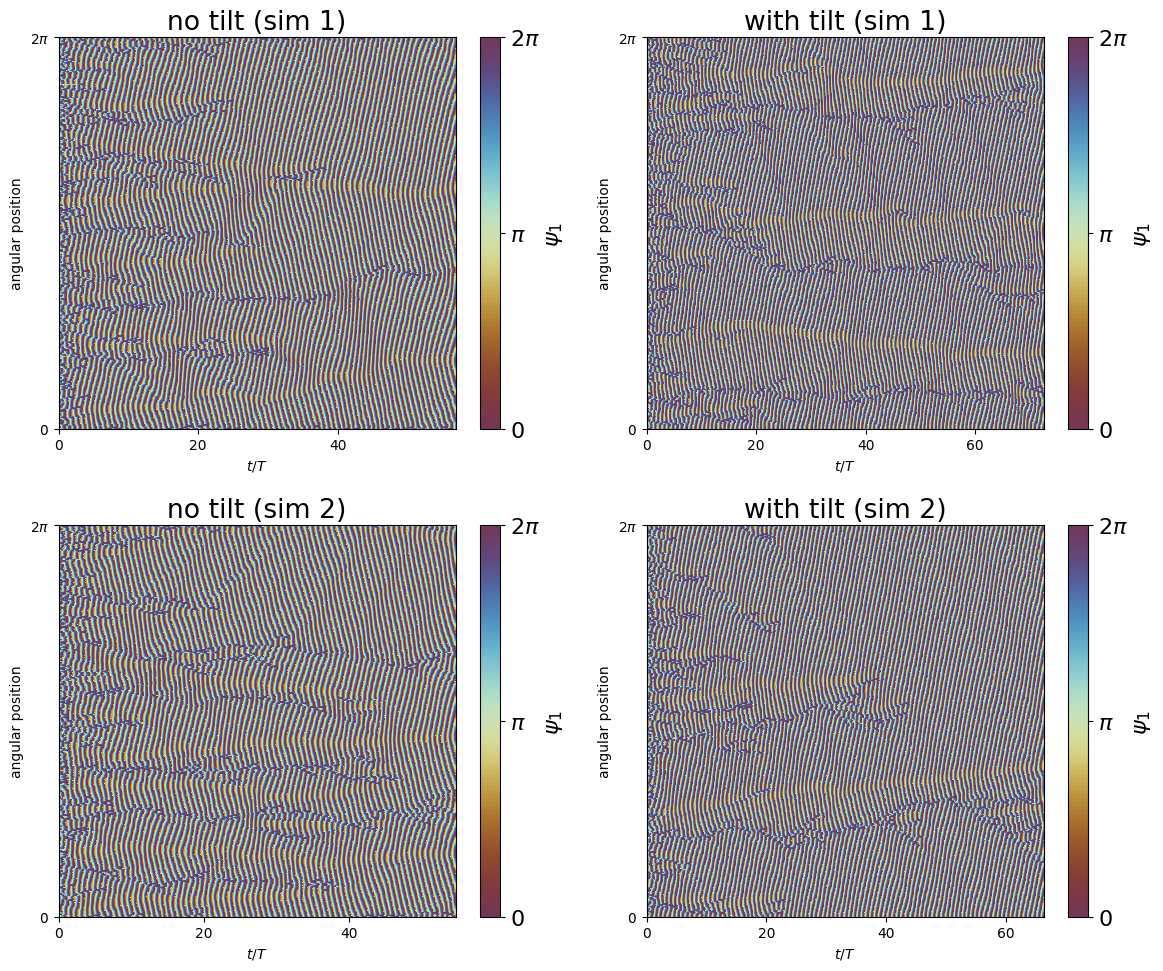

In [3]:
# --- Create Kymograph Grid ---
num_pairs = len(no_tilt_files)
if num_pairs == 0:
    print("No simulation files found.")
else:
    fig, axes = plt.subplots(nrows=num_pairs, ncols=2, figsize=(12, 5 * num_pairs), squeeze=False)
    plt.rcParams.update({"font.size": 16})

    for i in range(num_pairs):
        # --- No Tilt Kymograph ---
        ax = axes[i, 0]
        time = no_tilt_times[i]
        phases = no_tilt_phases[i]
        position = np.linspace(0, 2*np.pi, num_fils)
        xx, yy = np.meshgrid(time, position)
        im = ax.contourf(xx, yy, phases.T, cmap=cmc.romaO, levels=np.linspace(0, 2*np.pi, 100))
        
        cbar = fig.colorbar(im, ax=ax)
        cbar.set_label(r'$\psi_1$')
        cbar.set_ticks([0, np.pi, 2*np.pi])
        cbar.set_ticklabels([r'$0$', r'$\pi$', r'$2\pi$'])
        
        ax.set_xlabel(r'$t/T$')
        ax.set_ylabel('angular position')
        ax.set_title(f'no tilt (sim {i+1})')
        ax.set_yticks([0, 2*np.pi])
        ax.set_yticklabels([r'$0$', r'$2\pi$'])

        # --- With Tilt Kymograph ---
        ax = axes[i, 1]
        time = yes_tilt_times[i]
        phases = yes_tilt_phases[i]
        position = np.linspace(0, 2*np.pi, num_fils)
        xx, yy = np.meshgrid(time, position)
        im = ax.contourf(xx, yy, phases.T, cmap=cmc.romaO, levels=np.linspace(0, 2*np.pi, 100))

        cbar = fig.colorbar(im, ax=ax)
        cbar.set_label(r'$\psi_1$')
        cbar.set_ticks([0, np.pi, 2*np.pi])
        cbar.set_ticklabels([r'$0$', r'$\pi$', r'$2\pi$'])

        ax.set_xlabel(r'$t/T$')
        ax.set_ylabel('angular position')
        ax.set_title(f'with tilt (sim {i+1})')
        ax.set_yticks([0, 2*np.pi])
        ax.set_yticklabels([r'$0$', r'$2\pi$'])

    plt.tight_layout()
    plt.show()
    plt.rcParams.update(plt.rcParamsDefault)